In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
##Using Numpy Package to calculate the number of unique values
def unique_value(n,N):
    numlist = np.random.random_integers(0,N,n)
    repeat = len(np.unique(numlist))
    
    return repeat

def expected_unique_value(n, N):
    return (N + 1) * (1 - (1 - 1 / (N + 1))**n)

# Fomula for Unique Value

If I generate n randam integer between (0,N], the number of uniuqe value we expect could follow the fomula below.

$y=N(1-(1-\frac{1}{N})^{n})$

For each event, a certain integer has the possibily of $(1-\frac{1}{N})$ for not being chosen. If we process n events, then the possibily of a certain number that will not be selected should be $(1-\frac{1}{N})^{n}$. In other words, the possiblity for being chosen for a certain interger during the n events would be $(1-(1-\frac{1}{N})^{n})$. Because we have totally N intergers to choose from, then the unique values being chosen among these n events will be $N(1-(1-\frac{1}{N})^{n})$.

Each number in the range of (0,N] has the probabily of $(1-(1-\frac{1}{x})^{n})$ to be selected in to n number list

In [ ]:
np.random.seed(1)

def experiment(num_trial, n, N):
    unique_values = []
    for i in range(num_trial):
        val = unique_value(n, N)
        unique_values.append(val)
    return np.array(unique_values)

trails = 10000
n = 60
N = 100

values = experiment(trails, n, N)
exp_unique_value = expected_unique_value(n, N)
mean_values = np.mean(values)

print('Mean unique values: ', mean_values)
print('Expected unique values: ', exp_unique_value)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

Mean unique values:  45.3751
Expected unique values:  45.404588790286276


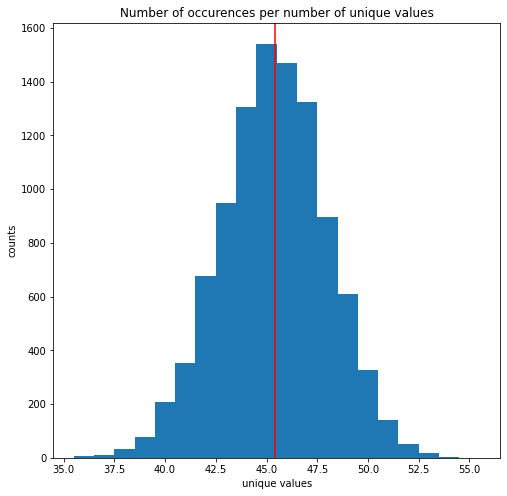

In [3]:
ax.hist(values, bins=bins)
ax.axvline(exp_unique_value, c='r')
ax.set_xlabel('unique values')
ax.set_ylabel('counts')
ax.set_title('Number of occurences per number of unique values')
plt.show()

In [4]:
def experiment (num_trial):
    ## a list of random N for trial
    N_list = np.random.random_integers(0,10000000,num_trial)
    unique_list=[]
    count = 0
    while count<num_trial:
        ##choose n as a random number between 0 and N
        n = np.random.random_integers(0,N_list[count],1)
        unique = unique_value(n, N_list[count])
        unique_list.append(unique)
        count+=1
    
    return N_list,unique_list


        
    
        

In [5]:
N_list,unique = experiment (100)

Text(0, 0.5, 'unique_number')

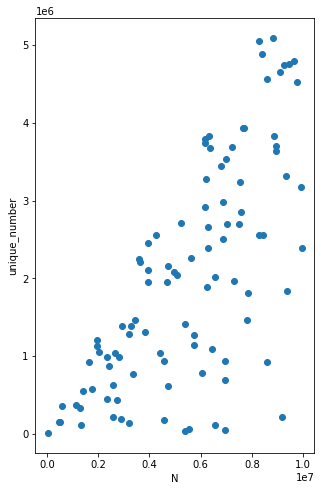

In [6]:
f = plt.figure(figsize=(5,8))
plt.scatter(N_list,unique)
plt.xlabel("N")
plt.ylabel("unique_number")


# Experiment

To prove our theoritical result, we experience with different n and N. For each set of (N,n), we choose a integer from (0,1e7) and a n value from (0,N). Then for every set of (N,n), we try 30 trials with different random seeds. And we save the mean and standard deviation for these 30 trials for each set of (N,n).

In [3]:
def experiment (num_trial):
    ## a list of random N for trial
    N_list = np.random.random_integers(0,10000000,num_trial)
    unique_list=[]
    count = 0
    #create a matrix to store N,n and the number of unique value for all trials.
    store_matrix_nN = []
    store_matrix_unique = []
    while count<num_trial:
        ##choose n as a random number between 0 and N
        n = np.random.random_integers(0,N_list[count],1)
        #create a list to store the numbers of unique value where the random seeds are different
        unique_list=[]
        for i in range (30):
            random.seed(i)    
            unique = unique_value(n, N_list[count])
            unique_list.append(unique)
        uniq_mean = np.mean(np.array(unique_list))
        uniq_std = np.std(np.array(unique_list))
        print(uniq_mean)
        #store_matrix_unique.append(unique_list)
        store_matrix_nN.append([n[0],N_list[count],uniq_mean,uniq_std])
        
        count+=1
    
    return store_matrix_nN #,store_matrix_unique

In [6]:
##generate 100 sets of (N.n)

matrix = experiment (100)

452748.3
585888.0
225582.33333333334
788606.2
4862569.333333333
1664860.4
1166117.8666666667
4553135.0
3203507.533333333
81944.3
2496356.7333333334
5015239.666666667
2117589.933333333
185782.16666666666
413941.5333333333
1404258.3
2900587.7
2402532.933333333
1209300.7333333334
2599751.2
3259781.466666667
3095193.1
4232701.4
2186564.5
48640.333333333336
839733.8
159380.8
2340149.3
204735.23333333334
1863025.1
3470097.933333333
150060.76666666666
4404293.2
4579063.1
2231447.3
1663840.3333333333
1156828.4333333333
1406294.7333333334
1286318.5333333334
129336.9
3356677.933333333
1465415.6333333333
366984.6
3826256.966666667
2673071.9
1080779.1666666667
294081.73333333334
1200167.3333333333
40916.7
2892725.533333333
662598.9666666667
238432.06666666668
775265.0666666667
855132.5
2773907.8666666667
463796.26666666666
568556.2
912874.8333333334
3504533.433333333
825898.0666666667
1995726.6666666667
3942428.1666666665
781027.3
2190389.9
669707.5666666667
4983678.066666666
1754663.5
3997433.2
8

# Plot the results


In [7]:
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    z = x*(1-(1-(1/x))**y)
    
    return z

def scatterdata(matrix,ax,fig):
    zdata = (np.array(matrix).T[2])
    ydata = np.array(matrix).T[1]
    xdata = np.array(matrix).T[0]
    err = (np.array(matrix).T[3])*100
    
    p = ax.scatter(xdata,ydata,zdata, c=zdata, cmap='viridis',s=30)
    fig.colorbar(p,ax=ax)
    
    for i in range (100):
        ax.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [zdata[i]+err[i], zdata[i]-err[i]],color='black')



def threeDplot(angle1, angle2, fig, position):
    ax = fig.add_subplot(position,projection='3d')
    # Data for a three-dimensional line
    xline = np.linspace(0, 10000000, 1000)
    yline = np.linspace(0,10000000,1000)
    
    X, Y = np.meshgrid(xline, yline)
    zline = f(X, Y)
    #zline = xline*(1-(1-(1/xline))**yline)
    #print(zline)
    
    ax.contour3D(xline, yline, zline, 50, cmap='viridis')
    ax.set_xlabel('n',fontsize = 15)
    ax.set_ylabel('N',fontsize = 15)
    ax.set_zlabel('unique_value', fontsize = 15)

    scatterdata(matrix,ax,fig)
    
    ax.invert_yaxis()
    
    ax.view_init(angle1, angle2)



Mapping N and n on a plane, our theoretical fomula $y=N(1-(1-\frac{1}{N})^{n})$ are plotted as 3D countours in the plots. The mean values of the 30 trials for each set of (N,n) are scattered on the same plots to see how well the experiment result match the theoretical formula. We also draw the standard deviation for those 30 trials as the error bar on the plot. But since the standard detivations are much smaller than the means, even if we plot 100 times the standard deviation, we can hardly see it on the figures. Therefore, we may assume that all the trial results fall into the scatter point area. 

From the figures, we can conclude that the experiment results match the theoretical formula well.

<ipython-input-7-7ac1c5261110>:4: RuntimeWarning: divide by zero encountered in true_divide
  z = x*(1-(1-(1/x))**y)
<ipython-input-7-7ac1c5261110>:4: RuntimeWarning: invalid value encountered in multiply
  z = x*(1-(1-(1/x))**y)


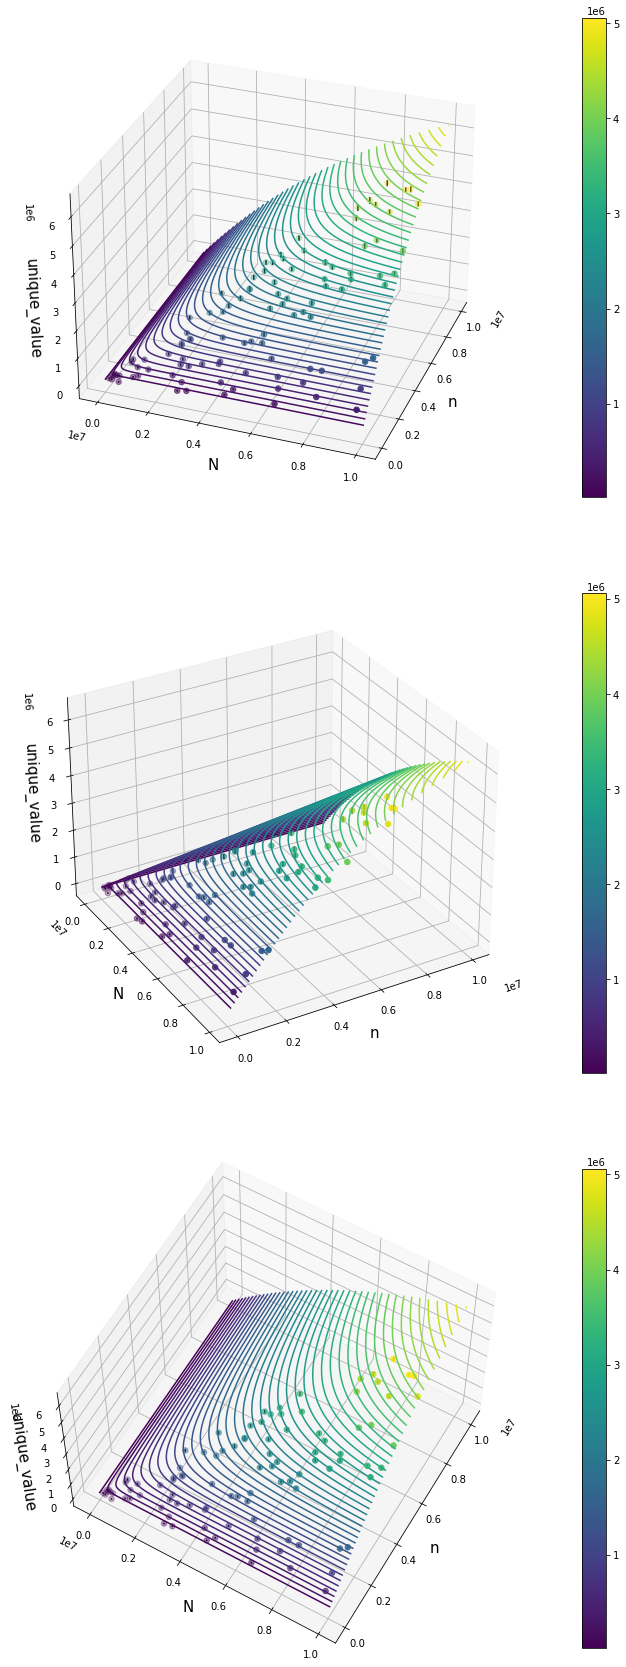

In [8]:
fig= plt.figure(3,figsize=(25, 30))
## 30,30
threeDplot(30,20,fig,311)
threeDplot(30,60,fig,312)
threeDplot(60,30,fig,313)